<a href="https://colab.research.google.com/github/marvinmouroum/cv-heart-rate-measurement/blob/master/cv_heart_rate_measurement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face detection

### Initialize the Code

In [0]:
import os
import cv2
import numpy as np
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import io
from googleapiclient.http import MediaIoBaseDownload
from google.colab import drive as gdrive

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import statistics

from IPython.display import Math, HTML

In [2]:
gdrive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Project/'
source_path = 'gdrive/My Drive/cohface/'

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Define paths
prototxt_path = os.path.join(root_path + 'deploy.prototxt')
caffemodel_path = os.path.join(root_path + 'weights.caffemodel')

prototxt_path_id = '1-zfDOBY5fVcEzwii2JlrIDFyhLyvu5m5'
caffemodel_path_id = '1jxuFoSukXr78rLfBgkLwn2qiWNUfoONf'
image_id = '1wb8whYMorQNU2YvmHZsZGFeUTDc-95DN'

downloaded = drive.CreateFile({'id': prototxt_path_id})
downloaded.GetContentFile('deploy.prototxt')

downloaded = drive.CreateFile({'id': caffemodel_path_id})
downloaded.GetContentFile('weights.caffemodel')

# Read the model
model = cv2.dnn.readNetFromCaffe(prototxt_path, caffemodel_path)

### Proof of Concept

Not needed for running for the detection

In [0]:
!ls gdrive/My\ Drive/Project

deploy.prototxt  example.jpg  weights.caffemodel


In [0]:
# Create directory 'updated_images' if it does not exist
if not os.path.exists('updated_images'):
	print("New directory created")
	os.makedirs('updated_images')

New directory created


In [0]:
# Create directory 'faces' if it does not exist
if not os.path.exists('faces'):
	print("New directory created")
	os.makedirs('faces')

New directory created


In [0]:
!ls images

ls: cannot access 'images': No such file or directory


In [0]:
# Loop through all images and save images with marked faces
for file in os.listdir('images'):
	file_name, file_extension = os.path.splitext(file)
	if (file_extension in ['.png','.jpg']):
		print("Image path: {}".format('images/' + file))

FileNotFoundError: ignored

In [0]:
image = cv2.imread('images/' + file)

(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

model.setInput(blob)
detections = model.forward()

In [0]:
# Create frame around face
for i in range(0, detections.shape[2]):
  box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
  (startX, startY, endX, endY) = box.astype("int")

  confidence = detections[0, 0, i, 2]

  # If confidence > 0.5, show box around face
  if (confidence > 0.5):
    cv2.rectangle(image, (startX, startY), (endX, endY), (255, 255, 255), 2)

cv2.imwrite('updated_images/' + file, image)
print("Image " + file + " converted successfully")

In [0]:
count = 0
# Identify each face
for i in range(0, detections.shape[2]):
  box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
  (startX, startY, endX, endY) = box.astype("int")

  confidence = detections[0, 0, i, 2]

  # If confidence > 0.5, save it as a separate file
  if (confidence > 0.5):
    count += 1
    frame = image[startY:endY, startX:endX]
    cv2.imwrite('faces/' + str(i) + '_' + file, frame)

In [0]:
!ls updated_images

In [0]:
from IPython.display import Image
display(Image('updated_images/image.jpg'))
display(Image('faces/0_image.jpg'))

In [0]:
downloaded = drive.CreateFile({'id': '10d5-_YC2lX09LfnbbvraW0GoAKeqXUDu'})
downloaded.GetContentFile('videos/data.avi')

## Video Implementation

### This sections creates a local document structure in order to 

*   save a video locally in *temp_video*
*   extract the face and save the image with bounding box locally in *bounding*
*   extract the face and save it in a specified folder *faces/videoID*
*   resize the face and save it in the directory *resized/videoID






In [0]:
#This will clean the creates data
def clean(temp='temp_video',bound='bounding',faces='faces',resized='resized'):
  !rm -r $temp
  !rm -r $bound
  !rm -r $faces
  !rm -r $resized 

#This will create all the necessary directories in order to perform the preprocessing
def create_infrastructure(temp='temp_video',bound='bounding',faces='faces',resized='resized'):
  !mkdir $temp
  !mkdir $bound
  !mkdir $faces
  !mkdir $resized
  !mkdir 'gdrive/My Drive/cohface/frames'

#This will copy a video from the drive in the respective directory and create a folder dedicated to it's id
def getVideo(path,id,faces='faces',bound='bounding',resized='resized',temp='temp_video'):
  !mkdir $faces/$id
  !mkdir $bound/$id
  !mkdir $resized/$id
  filetype = path.split('.')[-1]
  target   = "'" + temp + '/' + id + '.' + filetype + "'"
  source   = "'" + path + "'"
  #print("!cp" + " " + source + " " + target)
  !cp $path $target
  return temp + '/' + id + '.' + filetype

In [0]:
def resize_img(img,destination):
  # Create square images from pepes by adding black margins preserving original aspect ratio
  #Importing modules opencv + numpy
  import cv2
  import numpy as np

  w = 128
  h = 192

  #Reading an image (you can use PNG or JPG)
  name = img
  img = cv2.imread(img)

  if(img.shape[0] > h or img.shape[1] > w):
    #print("bigger image detected")
    img = cv2.resize(img,(w,h))

  if img is None:
    print("Could not read image ", name)
    return False

  #Creating a dark square with NUMPY  
  f = np.zeros((h,w,3),np.uint8)

  #Getting the centering position
  ax,ay = (w - img.shape[1])//2,(h - img.shape[0])//2

  #Pasting the 'image' in a centering position
  f[ay:img.shape[0]+ay,ax:ax+img.shape[1]] = img
  

  #Saving the image
  f = cv2.resize(f,(w,h),interpolation=cv2.INTER_NEAREST)
  cv2.imwrite(destination,f)
  cv2.destroyAllWindows() 
  return True

In [0]:
def find_face(image,id,fileID,bound='bounding',faces='faces'):

  count = 0

  (h, w) = image.shape[:2]
  blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

  model.setInput(blob)
  detections = model.forward()
  # Create frame around face
  for i in range(0, detections.shape[2]):
    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")

    confidence = detections[0, 0, i, 2]

    # If confidence > 0.5, show box around face
    if (confidence > 0.5):
      cv2.rectangle(image, (startX, startY), (endX, endY), (255, 255, 255), 2)
      #print(endX-startX)
      #print(endY-startY)
    
  cv2.imwrite( bound + '/' + id + '/' + fileID + '.png', image)

    # Identify each face#
  for i in range(0, detections.shape[2]):
    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")

    confidence = detections[0, 0, i, 2]

    # If confidence > 0.5, save it as a separate file
    if (confidence > 0.5):
      count += 1
      frame = image[startY:endY, startX:endX]
      #print(faces + '/' + id + '/' + fileID + '.png')
      cv2.imwrite( faces + '/' + id + '/' + fileID + '.png', frame)
      #cv2_imshow(frame)
      resize_img(faces + '/' + id + '/' + fileID + '.png','resized/' + id + '/' + fileID + '.png')
  
  if count == 0:
    print("did not find face for " , fileID)
    return
  else:
    return 'resized/' + id + '/' + fileID + '.png'


In [0]:
def analyze_video(video,id,temp='temp_video'):

  # load video stream
  VIDEO_STREAM =  temp + '/' + video

  # Initialize the video stream and pointer to output video file
  vs = cv2.VideoCapture(VIDEO_STREAM)
  writer = None
  vs.set(cv2.CAP_PROP_POS_FRAMES, 1);
  length = int(vs.get(cv2.CAP_PROP_FRAME_COUNT))
  print( "frame has length of " , length )
  i = 0
  frames = []
  while i < length:
    # read the next frame from the file
    (grabbed, frame) = vs.read()
    i += 1
    # If the frame was not grabbed, then we have reached the end
    # of the stream
    if not grabbed:
      print("Not grabbed.")
      break;
    newID = id + str(i)
    img = find_face(frame,id,newID)
    
    if img is None:
      print("image "+str(id)+" was not saved correctly")
      continue

    img_array = cv2.imread(img)

    if img_array is None:
      print("array is none - black image appended")
      frames.append( np.zeros((192, 128, 3)) )
      continue

    frames.append( img_array )
    
    if i%100 == 0:
      print(i)
    #break
  return frames

### This section generates frames only of the face and saves them in a folder on the drive and local storage

In [0]:
from google.colab.patches import cv2_imshow

def save_face_for(subject,folder):
  myid = str(subject)+'_'+str(folder)
  clean()
  create_infrastructure()
  filepath = getVideo('gdrive/My\ Drive/cohface/'+str(subject)+'/'+str(folder)+'/data.avi',myid)
  filename = filepath.split("/")[-1]
  frames = analyze_video(filename,myid)

  destination = 'gdrive/My\ Drive/cohface/frames/' + myid
  _destination = "'" + 'gdrive/My Drive/cohface/frames/' + myid + "'" 
  _source = "'resized/"+myid+"/.'"
  !mkdir $destination
  !cp -a $_source $_destination
  return frames

In [0]:
results = save_face_for(36,2)

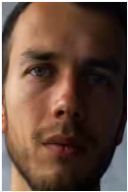

(192, 128, 3)

In [0]:
cv2_imshow(results[1000])

In [0]:
def getVideos(random, vtype, nb, path, videosPaths):
    if nb > len(videosPaths):
      for file in os.listdir(path): # Get files and directories of the directory
          _, currVidType = os.path.splitext(file)
          if os.path.isdir(file): # This is a directory
              getVideos(random, vtype, nb, path+'/'+file, videosPaths) 
          elif currVidType == '.'+vtype: # This is a file with the good video type
              videosPaths.append(path+'/'+file)
    return videosPaths 

In [0]:
def script(random, vtype, nb, directories):
  videosPaths = []
  if len(directories)==0:
    currentdirpath = os.getcwd()
    videosPaths = getVideos(random, vtype, nb, currentdirpath, videosPaths)
  else: 
    # there is no directory	 
    for i in range(0,len(directories)):
        videosPaths += getVideos(random, vtype, nb, directories[i],videosPaths)  
       
  return videosPaths

## Here will be the dataloader that organizes the dataset for our training

### Insights

This section is for reading the labeled data, plotting and analyzing it.

In [0]:
import h5py
#library documentation: http://docs.h5py.org/en/stable/quick.html

f = h5py.File('gdrive/My Drive/cohface/36/1/data.hdf5', 'r')
list(f.keys())

dset = f['pulse']
tset = f['time'] #in seconds

print(dset.shape)
tset.shape
int(tset[-1])

avg = statistics.mean(dset)
sd = statistics.stdev(dset)

srt = 50
stp = dset.size
avgV = [avg] * (stp-srt)

#have a look at the data
plt.plot(tset[srt:stp], dset[srt:stp], '-', color='black');
plt.plot(tset[srt:stp], avgV, '-', color='green');

# calculate polynomial
z = np.polyfit(tset[srt:stp], dset[srt:stp], 25)
f = np.poly1d(z)

y_new = f(tset[srt:stp])
print(y_new)
plt.plot(tset[srt:stp], y_new, '-', color='red');


### Methods

This section contains methods to extract the real HR from the raw BVP data. Some methods will extract the HR for every other second, others will extract the HR for every frame. In the latter case missing fields will be filled by existing values closed by.
Cleaning is performed to keep the HR values between 40 and 240 (like in the Paper) Wrong values will be substituted by the mean value.

In [0]:
def clean_hr_vector(vector):
  print("cleaning")

  cleaned = list(filter(lambda x: x < 240, vector))
  cleaned = list(filter(lambda x: x > 40, vector))
  mean = statistics.mean(cleaned)

  if vector[0] > 240 or vector[0] < 40:
    vector[0] = int(mean)

  for i in range(1,vector.size-1):

    if i % 500 == 0:
      print(str(int(100*i/vector.size)) + "%")
    
    if vector[i] == 0 and vector[i+1] != 0:
      vector[i] = int((vector[i-1]+vector[i+1])/2)
    
    if vector[i] > 240 or vector[i] < 40:
      vector[i] = int(mean)

  print("100%")
  return vector



In [0]:
def extract_hr(xset,yset,start=1,end=2000, plot=False):
   old_value = yset[start-1]
   old_t = xset[start-1]
   old_abs_t = 0

   vector = np.zeros((int(xset[-1])*2))

   valley = False

   nu = statistics.mean(yset)
   std = statistics.stdev(yset)

   # calculate polynomial
   z = np.polyfit(xset[50:-1], yset[50:-1], 25)
   f = np.poly1d(z)
  
   y_new = f(xset)
   if plot:
    plt.plot(xset[50:-1], y_new[50:-1], '-', color='red');
    plt.show()


   for i in range(start,end):
     
     if i >= yset.size or i >= y_new.size:
       break

     if yset[i] < y_new[i] and not valley:
        valley = True

     if yset[i] > y_new[i]+std*0.5 and valley:
        valley = False
        
        #print(str(int(60/(xset[i]-old_t))) + " bpm at " + str(old_abs_t) )
        if old_abs_t == int(xset[-1]):
          break

        hr = int(60/(xset[i]-old_t))

        if(int(2*old_abs_t) >= len(vector)):
          continue
        
        if vector[int(2*old_abs_t)] == 0:
          vector[int(2*old_abs_t)] = hr
        elif abs((vector[int(2*old_abs_t)-1]-vector[int(2*old_abs_t)])/vector[int(2*old_abs_t)-1]) > abs((vector[int(2*old_abs_t)-1]-hr)/vector[int(2*old_abs_t)-1]):
          vector[int(2*old_abs_t)] = hr


        old_t = xset[i]

     if int(2*xset[i])/2 > old_abs_t:
       old_abs_t = int(2*xset[i])/2

   return clean_hr_vector(vector)

def hr_frame_label(xset,yset,start=1,end=2000, plot=False):
   old_value = yset[start-1]
   old_t = xset[start-1]

   vector = np.zeros(xset.size)

   valley = False

   lastI = 0

   nu = statistics.mean(yset)
   std = statistics.stdev(yset)

   # calculate polynomial
   z = np.polyfit(xset[50:-1], yset[50:-1], 25)
   f = np.poly1d(z)
  
   y_new = f(xset)
   if plot:
    plt.plot(xset[50:-1], y_new[50:-1], '-', color='red');
    plt.show()


   for i in range(start,end):
     
     if i >= yset.size or i >= y_new.size:
       break

     if yset[i] < y_new[i] and not valley:
        valley = True

     if yset[i] > y_new[i]+std*0.25 and valley:
        valley = False

        hr = int(60/(xset[i]-old_t))
        #print(str(xset[i])+"-"+str(old_t)+"="+str(hr))
        
        if vector[i] == 0:

          if i == 0:
            vector[i] = hr
          else:
            vector[lastI:i+1] = [hr] * (i-lastI+1)

          lastI = i
        elif abs((vector[i-1]-vector[i])/vector[i-1]) > abs((vector[i-1]-hr)/vector[i-1]):
          vector[lastI:i+1] = [hr] * (i-lastI+1)
          lastI = i
        #print(str(i)+": " + str(vector[i]) + " - " + str(hr))


        old_t = xset[i]

   return clean_hr_vector(vector)
  
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

def peak_hr_estimation(xset,yset,start=1,end=2000, plot=False):
  data = yset[start:end]
  times = xset[start:end]

  peaks, _ = find_peaks(data, height=0)
  avg = statistics.mean(data)
  avgV = [avg]*len(list(data))
  
  z = np.polyfit(times,data, 5)
  f = np.poly1d(z)

  hr_times = []
  hr = []

  for i in range(0,len(data[list(peaks)])):
    if data[list(peaks)][i] > f(times[list(peaks)][i])*1.01:
      #print(str(times[list(peaks)][i]) + ": " + str(data[list(peaks)][i]) + ">" + str(f(times[list(peaks)][i])*1.02))
      hr_times.append(times[list(peaks)][i])
      if len(hr_times) > 1:
        hr.append(int(60/(hr_times[-1] - hr_times[-2])))

#  print(hr)


  if plot:
    plt.plot(times,data)
    plt.plot(times,avgV,'-',color='green')
    plt.plot(times,f(times),'-',color='red')
    plt.plot(times[list(peaks)], data[list(peaks)],'x')
    plt.show()

  hr_times.pop()
  return [hr_times,hr] 


In [0]:
#extract_hr(tset,dset,0,16000)
def get_hr(subject,folder,window=1000):
  f = h5py.File('gdrive/My Drive/cohface/'+str(subject)+'/'+str(folder)+'/data.hdf5', 'r')

  dset = f['pulse']
  tset = f['time'] #in seconds
  rates = []
  times = []
  for i in range(0,len(dset),window):
    res = peak_hr_estimation(tset[i:i+window],dset[i:i+window],0,window,False)
    rates += res[1]
    times += res[0]

  return times, rates


In [0]:
print(rates)
print(clean_hr_vector(np.array(rates)))

[111, 46, 247, 152, 93, 93, 232, 93, 93, 94, 96, 97, 95, 96, 94, 96, 96, 96, 94, 92, 93, 93, 93, 94, 93, 91, 91, 90, 89, 89, 89, 88, 88, 92, 93, 92, 91, 284, 134, 91, 100, 96, 96, 97, 94, 94, 93, 93, 93, 94, 91, 94, 93, 94]
cleaning
100%
[111  46 103 152  93  93 232  93  93  94  96  97  95  96  94  96  96  96
  94  92  93  93  93  94  93  91  91  90  89  89  89  88  88  92  93  92
  91 103 134  91 100  96  96  97  94  94  93  93  93  94  91  94  93  94]


In [0]:
def heartRateForSubjects(from_=1,to=40,folder_start=0,folder_end=3, plot = False):
  rates = [[[0]]* (folder_end-folder_start)] * (to-from_)
  print(rates)
  for i in range(from_,to):
    for j in range(folder_start,folder_end):
      print("\nsubject " + str(i) + " set: " + str(j) + "\n_________________")
      f = h5py.File('gdrive/My Drive/cohface/' + str(i) + '/'+ str(j) +'/data.hdf5', 'r')
      dset = f['pulse']
      tset = f['time']
      if plot:
        plt.plot(tset[50:-1], dset[50:-1], '-', color='black');
      rates[i-from_][j-folder_start] = extract_hr(tset,dset,0,16000,plot)
  return rates

def heartRateForFrames(from_=1,to=40,folder_start=0,folder_end=3, plot = False):
  rates = [[[0]]* (folder_end-folder_start)] * (to-from_)
  print(rates)
  for i in range(from_,to):
    for j in range(folder_start,folder_end):
      print("\nsubject " + str(i) + " set: " + str(j) + "\n_________________")
      f = h5py.File('gdrive/My Drive/cohface/' + str(i) + '/'+ str(j) +'/data.hdf5', 'r')
      dset = f['pulse']
      tset = f['time']
      if plot:
        plt.plot(tset[50:-1], dset[50:-1], '-', color='black');
      rates[i-from_][j-folder_start] = hr_frame_label(tset,dset,0,16000,plot)
  return rates
  



[[[0]]]

subject 1 set: 1
_________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RankWarning: Polyfit may be poorly conditioned


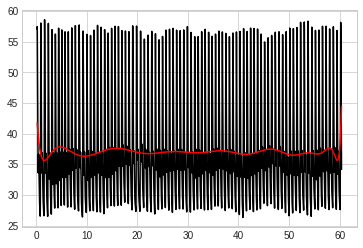

cleaning
3%
6%
9%
12%
16%
19%
22%
25%
29%
32%
35%
38%
42%
45%
48%
51%
54%
58%
61%
64%
67%
71%
74%
77%
80%
84%
87%
90%
93%
97%
100%


In [0]:
#values = heartRateForSubjects(19,20,0,4,True)

values = heartRateForFrames(1,2,1,2,True)


In [0]:
print(values[0][0].shape)

(15456,)


In [0]:
print(str(len(values)))

for l in values:
  print(str(len(l)))
  for value in l:
    print(len(value[1:-2]))
    print(statistics.mean(value[1:-2]))
    print(statistics.stdev(value[1:-2]))
    print(min(value[1:-2]))
    print(max(value[1:-2]))
    print("\n")

In [0]:
heartRateForSubjects(folder_start=1,folder_end=2,plot=True)

### Dataloader

A potential data loader object

In [0]:
import h5py

def get_data(subject,folder,window=1000):
  
  print('\nget data for subject ' +str(subject)+ ' folder ' + str(folder))
  data = []
  #print('saving face')
  frames = save_face_for(subject,folder)
  #print('extract heart rate from BVP')
  hr = get_hr(subject,folder,window) #0 = time, 1 = heart rate
  time = np.array(hr[0])
  rate = clean_hr_vector(np.array(hr[1]))
  #print('map the faces with the heart rate')
  #associate a hr to every frame
  #print(str(len(frames)) + 'frames in 60 seconds is ' + str(len(frames)/60) + ' frames per second' )
  d = 1/(len(frames)/60)
  t = 0.5
  T = 0

  #print(time)
  #print(rate)

  ass_rate = statistics.mean(rate)

  for i in range(0,len(frames)):

    if T > t:
      t = t+0.5
    
    first_index = np.where(time >= t-0.5)[0]
    
    index = np.where(time[list(first_index)] < t)

    #print('at t '+str(t) + ' index: ' + str(index[0]) + ' and value is ' + str(rate[first_index][index[0]]))

    if first_index is None or first_index.size == 0 or index[0] is None or index[0].size == 0:
      data.append((frames[i],ass_rate))
    else:
      ass_rate = rate[first_index][index[0]][-1]
      data.append((frames[i],ass_rate))

    T = T + d

  return data

In [0]:
labeled_data = get_data(1,1)


get data for subject 1 folder 1
mkdir: cannot create directory ‘gdrive/My Drive/cohface/frames’: File exists
frame has length of  1207
100
200
300
400
500
600
700
800
900
1000
1100
1200
Not grabbed.
mkdir: cannot create directory ‘gdrive/My Drive/cohface/frames/1_1’: File exists
cleaning
100%


In [0]:
i = 500
for i in range(0,len(labeled_data)):
  cv2_imshow(labeled_data[i][0])
  print(labeled_data[i][1])

## Network

### Loss function



*   𝓁: loss
*   ϕ: concatenation of convolutional filter parameters
*   𝓣: labelled training set
*   SNR: Signal-To-Noise Ratio
*   PSD: Power Spectral Density
*   f: true HR
*   X: a sequence of N facial images






In [0]:
display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/"
               "latest.js?config=default'></script>"))
Math(r'\ell(\mathcal{T};\phi) = -\frac{1}{l} \sum_{j=1}^{l} SNR(f^j,X^j;\phi)')

<IPython.core.display.Math object>

In [0]:
def PSD(f,X,h,n,fs=20):

  #f given frequency in Hz
  #X is set of images
  #Phi is filter parameters
  #h is extractor output
  #fs is sampling frequency in Hz

  f_hat = f/60

  result1 = torch.sum(h(X)*torch.cos(2*math.pi*f_hat*n/fs), dim=1)
  result2 = torch.sum(h(X)*torch.sin(2*math.pi*f_hat*n/fs), dim=1)


  return result1**2 + result2**2


In [0]:
def SNR(f,X,F,d,h):

  #f true hr
  #X set of images
  #F is set of possible HR
  #d tolerance interval

  Fplus = list(filter(lambda x: x > f-d, F))
  Fplus = list(filter(lambda x: x < f+d, Fplus))

  Fminus1 = list(filter(lambda x: x < f-d, F))
  Fminus2 = list(filter(lambda x: x > f+d, F))
  Fminus = Fminus1 + Fminus2
  del Fminus1, Fminus2

  N = X.shape[0]

  n = torch.linspace(0,N-1,1).cuda()

  result1 = sum(list(map(lambda x:PSD(x,X,h,n),Fplus)))
  result2 = sum(list(map(lambda x:PSD(x,X,h,n),Fminus)))


  return 10*torch.log10(result1/result2)


In [0]:
def loss_function(h,X,f,F,d=5):
  #X is a list of lists
  #f is the corresponding hr to a list in X

  #result = 0
  l = len(X)

  result = -1*sum(list(map(lambda x,y:SNR(x.item(),y,F,d,h),f[:,-1],X)))/l
  
  #for i in range(0,l):
    #result = result + SNR(f[i,-1].item(),X[i],F,d,h)
    
  return result

In [0]:
#Initiate set of possible heart rates
F = []
for i in range(40,240):
  F.append(i)

### Network definition

Implementation details Both networks use a standard chain of convolution, MaxPool and
activation functions. Before the first convolution layer and after every MaxPool layer, a
batch normalization was inserted. Exponential Linear Units [2] were used as the activation
functions. Dropout was used. Batch normalization was initialized with weights randomly
sampled from a Gaussian distribution with m = 0 and s = 0:1, convolution layers were
initialized according to the method described in [3]. Both network components were trained
using PyTorch library, Adam optimizer was used with learning rate set to 0:0001 in case of
the Extractor and to 0:1 in case of the HR estimator. For both training setups, a set of all input
facial RGB images X = R192128. Faces were found by a face detector, the bounding boxes
were adjusted to the aspect ratio 3 : 2 to cover the whole face, cropped out and resized to
192128 pixels. The set of true HR F = {40/60 ; 41/60; : : : ; 240/60} in case of extractor and F = R0+
in case of estimator.

In [0]:
## PyTorch 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch import Tensor
import torch.optim as optim
import torchvision

import math #for calculus
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

from sklearn import svm
import pickle

In [0]:
class Extractor(nn.Module):
    
    def __init__(self,name='Extractor'):
        super(Extractor, self).__init__()
        self.T = 120
        
        self.name = name
        
        self.training_epochs = 0
        
        self.lr_history       = []
        self.accuracy_history = []
        self.loss_history     = []
        
        self.batchnorm0 = nn.BatchNorm2d(3)
        self.conv1 = nn.Conv2d(3,64,(10,15),2,2,2)

        self.pooling1 = nn.MaxPool2d((10,15), stride=2, padding=(2,4), dilation=2)
        self.batchnorm1 = nn.BatchNorm2d(64)

        self.pooling2 = nn.MaxPool2d((10,15), stride=2, padding=(2,4), dilation=2)
        self.batchnorm2 = nn.BatchNorm2d(64)
        
        self.pooling3 = nn.MaxPool2d((10,14), stride=2, padding=(3,4), dilation=1)
        self.batchnorm3 = nn.BatchNorm2d(64)

        self.fc = torch.nn.Linear(in_features=64*1*1, out_features=1)
      
        
        # robust weight initialization
        torch.nn.init.xavier_normal_(self.conv1.weight)
      

        
    def forward(self, x):

        # first set of CNNs and then a max pool
        x = x.permute(0,3,2,1)
        #print(x.shape)
        x = self.batchnorm0(x)
        x = self.conv1(x)
        x = F.elu(x)
        #print(x.shape)
        x = self.pooling1(x)
        x = self.batchnorm1(x)
        #print(x.shape)
        x = self.pooling2(x)
        x = self.batchnorm2(x)
        #print(x.shape)
        x = self.pooling3(x)
        x = self.batchnorm3(x)
        #print(x.shape)
        
        batch_size, C, H, W = x.size()
        
        x = x.view(batch_size, H*W*C)

        x = F.elu(self.fc(x))
        
        return x
      
    def save(self,root='gdrive/My\ Drive/DeepLearning/Nets'):
      !mkdir $root
  
      path = root.replace('\\','') + '/' + self.name + '.pickle'
    
      print("\nsaving network under:\n",path)
      
      with open(path, 'wb') as f:
        pickle.dump(self, f)
        
    def next_epoch(self,lr,acc_hist,loss_hist):
      self.training_epochs += 1
      self.lr_history.append(lr)
      self.accuracy_history.append(acc_hist)
      self.loss_history.append(loss_hist)
    
    def reset(self):
      self.training_epochs = 0
      self.lr_history = []
      self.accuracy_history = []
      self.loss_history = []

### Network Training Methods

In [0]:
def get_cost_function():
    
  return loss_function
    
def get_optimizer(net, lr=0.0001, wd=1e-5, momentum=0.01):
  optimizer = torch.optim.Adam(net.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=wd, amsgrad=False)
  return optimizer

In [0]:
def test(net, cost_function, device='cuda:0'):
  samples = 0.
  sequences = 0.
  cumulative_loss = 0.
  cumulative_accuracy = 0.
  cumulative_seq_accuracy = 0.

  seq = 200

  net.eval() # Strictly needed if network contains layers which has different behaviours between train and test
  
  with torch.no_grad():
      
    #zero mean and normalize the data
    mean = t_data.mean()
    std  = t_data.std()
      
    t_data = (t_data - mean)/std
      
    # Load data into GPU
    inputs = t_data.float().to(device)
    targets = t_labels.to(device)
      
    # Apply the loss (h,X,f,Phi,F,d=5)
    loss = cost_function(net,inputs,targets, net.parameters,F,d=5)

    cumulative_loss += loss
  
  
  return cumulative_loss/samples

In [0]:
def train(net, t_data, t_labels, cost_function,optimizer,batch_size = 5, device='cuda:0'):
  samples = 0.
  sequences = 0.
  cumulative_loss = 0.
  cumulative_accuracy = 0.
  cumulative_seq_accuracy = 0.

  seq = 200

  net.train() # Strictly needed if network contains layers which has different behaviours between train and test
      
  #zero mean and normalize the data
  mean = t_data.mean()
  std  = t_data.std()
      
  t_data = (t_data - mean)/std

  count,h,w,d = np.array(t_data).shape
  
  batch = int(count/batch_size)
  
  # Load data into GPU
  inputs = t_data.view(batch,batch_size,h,w,d).float().to(device)
  targets = t_labels.view(batch,batch_size).to(device)

  F = []
  for i in range(40,240):
    F.append(i)
    
  # Apply the loss (h,X,f,Phi,F,d=5)
  loss = cost_function(net,inputs,targets,F,d=5)

  # Backward pass
  loss.sum().backward()
    
  # Update parameters
  optimizer.step()
    
  # Reset the optimizer
  optimizer.zero_grad()

  cumulative_loss += loss.sum()
  
  
  return cumulative_loss

* Video Visualization of the Face color

* Results for CNN

* send the specification of delivery

In [24]:
net = Extractor()
i = 0
dataset = get_data(1,i)



get data for subject 1 folder 0
rm: cannot remove 'temp_video': No such file or directory
rm: cannot remove 'bounding': No such file or directory
rm: cannot remove 'faces': No such file or directory
rm: cannot remove 'resized': No such file or directory
mkdir: cannot create directory ‘gdrive/My Drive/cohface/frames’: File exists
frame has length of  1205
100
200
300
400
500
600
700
800
900
1000
1100
1200
Not grabbed.
mkdir: cannot create directory ‘gdrive/My Drive/cohface/frames/1_0’: File exists
cleaning
100%


In [0]:
imgs = torch.Tensor(list(map(lambda x: x[0], dataset)))
labels = torch.LongTensor(list(map(lambda x: x[1], dataset)))

net = Extractor()
net.to('cuda:0')
losses = []
for i in range(0,len(imgs),4):
  if i+4 >= len(imgs):
    break
  print(i)
  L = train(net,imgs[i:i+4],labels[i:i+4],get_cost_function(),optimizer=get_optimizer(net),batch_size = 2)
  losses.append(L)

mlt.plot(losses)